1. Download the Iris Flower dataset from https://www.kaggle.com/datasets/arshid/iris-flower-dataset.


2. Load data into Pandas DataFrame


In [ ]:
import pandas as pd
df = pd.read_csv('IRIS.csv')

3. Explore the dataset, report the number of data and features



In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.shape

(150, 5)

4. Visualize some sample images of the dataset using Matplotlib



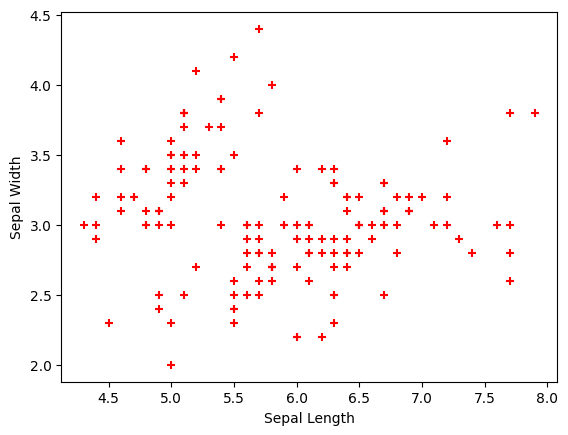

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df['sepal_length'], df['sepal_width'],color="red",marker='+')

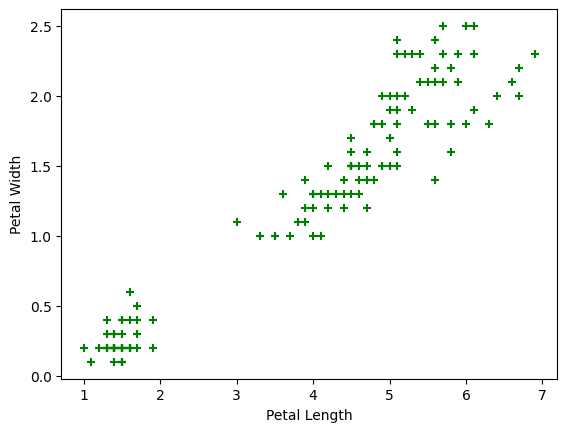

In [ ]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df['petal_length'], df['petal_width'],color="green",marker='+')

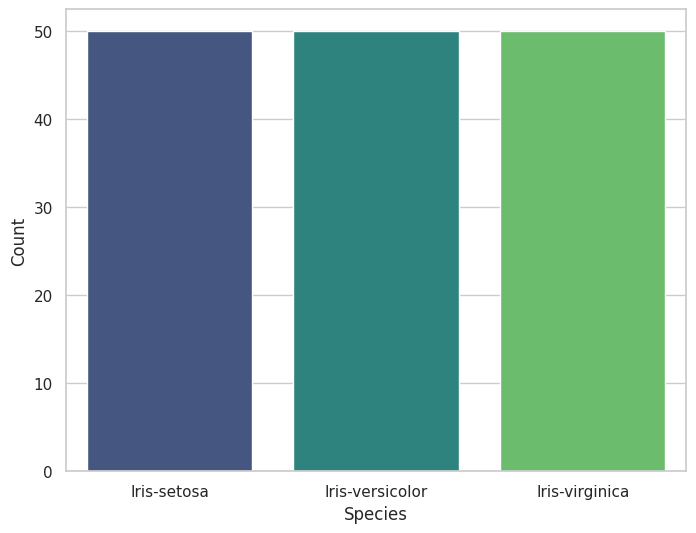

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
species_counts = df['species'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=species_counts.index, y=species_counts.values, palette="viridis")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

5. Preprocess the dataset as necessary, for example, splitting, scaling, normalizing, etc.




In [ ]:
X = df.iloc[:, 0:4]

In [ ]:
y = df.iloc[:, 4]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X,
y,
test_size=0.20,
random_state=25,
)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

6. Train Logistic Regression, Support Vector Machine, and Decision Tree algorithm on the dataset.


In [ ]:
from sklearn.linear_model import SGDClassifier

model_regression = SGDClassifier(
    loss='squared_error',
    penalty='l1',
    alpha=0.5,
    fit_intercept=True,
    learning_rate='constant',
    eta0=0.01,
    early_stopping=True,
    n_iter_no_change=20,
    tol=1e-3,
)

model_regression.fit(X_train, y_train)

SGDClassifier(alpha=0.5, early_stopping=True, eta0=0.01,
              learning_rate='constant', loss='squared_error',
              n_iter_no_change=20, penalty='l1')

In [ ]:
from sklearn.svm import SVC
model_svm = SVC(kernel='poly', C=1, random_state=25)
model_svm.fit(X_train, y_train)

SVC(C=1, kernel='poly', random_state=25)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(
criterion='gini',
splitter='best',
min_samples_split=3,
min_samples_leaf=1,
)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=3)

7. Use hyperparameter tuning techniques to select the best hyperparameters of the respective models, and finally select the best model
of each kind.



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param = {
'loss': ['hinge', 'log_loss', 'squared_hinge'],
'penalty': ['l2', 'l1', 'elasticnet'],
'alpha': uniform(0.0001, 0.1),
'fit_intercept': [True, False],
'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
'eta0': uniform(0.001, 0.5),
'tol': [1e-6, 1e-5, 1e-4],
'early_stopping': [True, False],
'n_iter_no_change': randint(5, 20)
}
random_sgd = RandomizedSearchCV(
SGDClassifier(max_iter=10000),
param_distributions=param,
n_iter=10,
scoring="accuracy",
cv=5,
)
random_sgd.fit(X_train, y_train)
best_sgd = random_sgd.best_estimator_

In [ ]:
param = {
'C': uniform(0.1, 100),
'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
'gamma': ['scale', 'auto', 0.1, 1, 10],
'degree': randint(2, 5),
'coef0': uniform(0.0, 1.0)
}
random_svm = RandomizedSearchCV(
SVC(),
param_distributions=param,
verbose=2,
scoring="accuracy",
n_iter=10,
cv=5,
)
random_svm.fit(X_train, y_train)
best_svm = random_svm.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END C=63.63907957123094, coef0=0.7790749775124951, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=63.63907957123094, coef0=0.7790749775124951, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=63.63907957123094, coef0=0.7790749775124951, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=63.63907957123094, coef0=0.7790749775124951, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=63.63907957123094, coef0=0.7790749775124951, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END C=8.355379304776234, coef0=0.4022891295540003, degree=3, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=8.355379304776234, coef0=0.4022891295540003, degree=3, gamma=10, kernel=rbf; total time=   0.1s
[CV] END C=8.355379304776234, coef0=0.4022891295540003, degree=3, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=8.355379304776234, coef0=0.4022891295540003, de

In [ ]:
param = {
"criterion": ("gini", "entropy", "log_loss"),
"splitter": ("best", "random"),
"max_depth": (list(range(1, 20))),
"min_samples_split": list(range(2, 20)),
"min_samples_leaf": list(range(1, 20)),
}
random_dt = RandomizedSearchCV(
DecisionTreeClassifier(random_state=25),
param_distributions=param,
verbose=2,
n_iter=10,
scoring="accuracy",
cv=5,
)
random_dt.fit(X_train, y_train)
best_dt = random_dt.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=12, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=12, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=12, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[

8. Evaluate training performance on the train data by generating confusion matrices and computing accuracy, precision, recall, f1 score,
and so on.



Logistic Regression

Accuracy: 98.33%
           Iris-setosa  Iris-versicolor  Iris-virginica  accuracy   macro avg  \
precision          1.0         1.000000        0.954545  0.983333    0.984848   
recall             1.0         0.945946        1.000000  0.983333    0.981982   
f1-score           1.0         0.972222        0.976744  0.983333    0.982989   
support           41.0        37.000000       42.000000  0.983333  120.000000   

           weighted avg  
precision      0.984091  
recall         0.983333  
f1-score       0.983296  
support      120.000000  


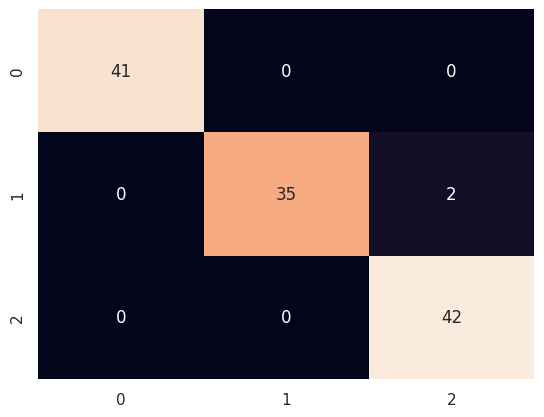

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("Logistic Regression\n")
train_preds = best_sgd.predict(X_train)
clf_report = pd.DataFrame(classification_report(y_train, train_preds, output_dict=True))
print(f"Accuracy: {accuracy_score(y_train, train_preds) * 100:.2f}%")
print(f"{clf_report}")
sns.heatmap(confusion_matrix(y_train, train_preds),
annot=True, cbar=False, fmt='d')
plt.show()

SVM

Accuracy: 98.33%
           Iris-setosa  Iris-versicolor  Iris-virginica  accuracy   macro avg  \
precision          1.0         1.000000        0.954545  0.983333    0.984848   
recall             1.0         0.945946        1.000000  0.983333    0.981982   
f1-score           1.0         0.972222        0.976744  0.983333    0.982989   
support           41.0        37.000000       42.000000  0.983333  120.000000   

           weighted avg  
precision      0.984091  
recall         0.983333  
f1-score       0.983296  
support      120.000000  


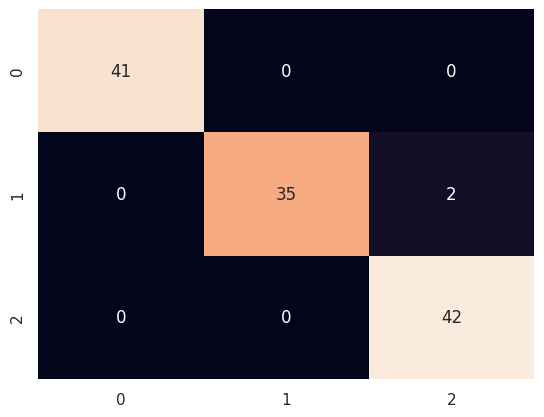

In [ ]:
print("SVM\n")
train_preds = best_svm.predict(X_train)
clf_report = pd.DataFrame(classification_report(y_train, train_preds, output_dict=True))
print(f"Accuracy: {accuracy_score(y_train, train_preds) * 100:.2f}%")
print(f"{clf_report}")
sns.heatmap(confusion_matrix(y_train, train_preds),
annot=True, cbar=False, fmt='d'
)
plt.show()

Decision Tree

Accuracy: 98.33%
           Iris-setosa  Iris-versicolor  Iris-virginica  accuracy   macro avg  \
precision          1.0         0.948718        1.000000  0.983333    0.982906   
recall             1.0         1.000000        0.952381  0.983333    0.984127   
f1-score           1.0         0.973684        0.975610  0.983333    0.983098   
support           41.0        37.000000       42.000000  0.983333  120.000000   

           weighted avg  
precision      0.984188  
recall         0.983333  
f1-score       0.983349  
support      120.000000  


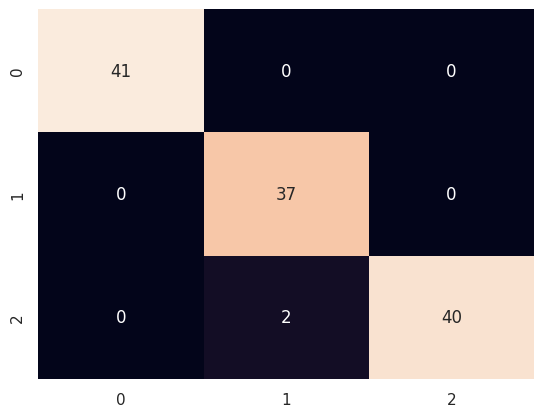

In [ ]:
print("Decision Tree\n")
train_preds = best_dt.predict(X_train)
clf_report = pd.DataFrame(classification_report(y_train, train_preds, output_dict=True))
print(f"Accuracy: {accuracy_score(y_train, train_preds) * 100:.2f}%")
print(f"{clf_report}")
sns.heatmap(confusion_matrix(y_train, train_preds),
annot=True, cbar=False, fmt='d'
)
plt.show()

9. Evaluate their results on the test data by generating confusion matrices and computing accuracy, precision, recall, f1 score, and so on.
Use bootstrapping to measure average accuracy/precision/recall and their 95% confidence interval.

Logistic Regression

Accuracy: 93.33%
           Iris-setosa  Iris-versicolor  Iris-virginica  accuracy  macro avg  \
precision          1.0         1.000000        0.800000  0.933333   0.933333   
recall             1.0         0.846154        1.000000  0.933333   0.948718   
f1-score           1.0         0.916667        0.888889  0.933333   0.935185   
support            9.0        13.000000        8.000000  0.933333  30.000000   

           weighted avg  
precision      0.946667  
recall         0.933333  
f1-score       0.934259  
support       30.000000  


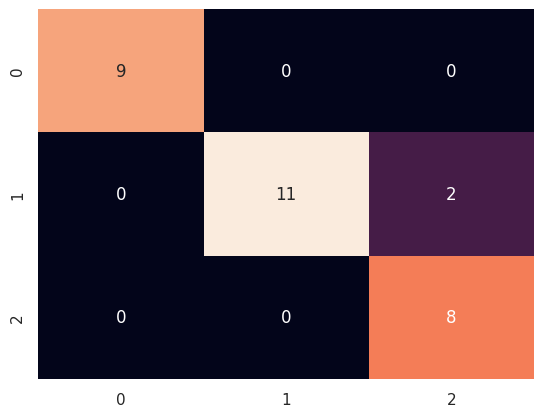

In [ ]:
print("Logistic Regression\n")
test_preds = best_sgd.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, test_preds, output_dict=True))
print(f"Accuracy: {accuracy_score(y_test, test_preds) * 100:.2f}%")
print(f"{clf_report}")
sns.heatmap(confusion_matrix(y_test, test_preds),
annot=True, cbar=False, fmt='d'
)
plt.show()

SVM

Accuracy Score: 93.33%
           Iris-setosa  Iris-versicolor  Iris-virginica  accuracy  macro avg  \
precision          1.0         1.000000        0.800000  0.933333   0.933333   
recall             1.0         0.846154        1.000000  0.933333   0.948718   
f1-score           1.0         0.916667        0.888889  0.933333   0.935185   
support            9.0        13.000000        8.000000  0.933333  30.000000   

           weighted avg  
precision      0.946667  
recall         0.933333  
f1-score       0.934259  
support       30.000000  


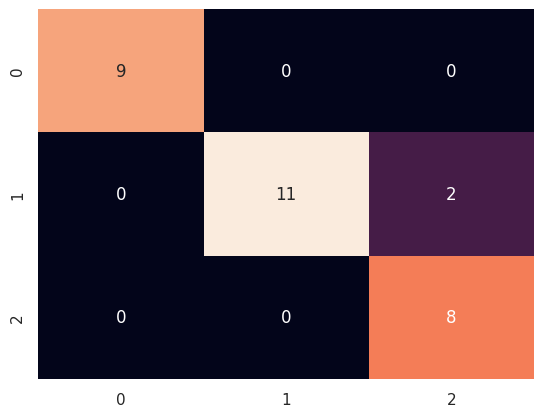

In [ ]:
print("SVM\n")
test_preds = best_svm.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, test_preds, output_dict=True))
print(f"Accuracy Score: {accuracy_score(y_test, test_preds) * 100:.2f}%")
print(f"{clf_report}")
sns.heatmap(confusion_matrix(y_test, test_preds),
annot=True, cbar=False, fmt='d'
)
plt.show()

Decision Tree

Accuracy Score: 93.33%
           Iris-setosa  Iris-versicolor  Iris-virginica  accuracy  macro avg  \
precision          1.0         0.923077           0.875  0.933333   0.932692   
recall             1.0         0.923077           0.875  0.933333   0.932692   
f1-score           1.0         0.923077           0.875  0.933333   0.932692   
support            9.0        13.000000           8.000  0.933333  30.000000   

           weighted avg  
precision      0.933333  
recall         0.933333  
f1-score       0.933333  
support       30.000000  


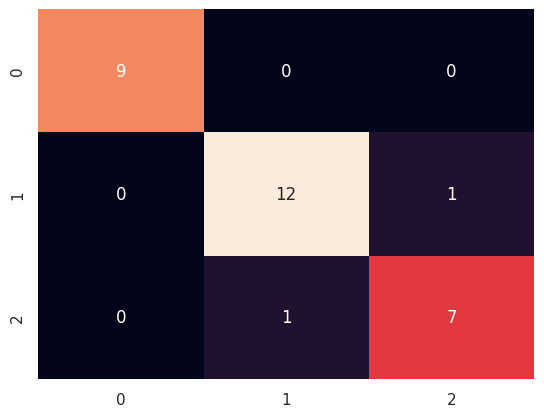

In [ ]:
print("Decision Tree\n")
test_preds = best_dt.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, test_preds, output_dict=True))
print(f"Accuracy Score: {accuracy_score(y_test, test_preds) * 100:.2f}%")
print(f"{clf_report}")
sns.heatmap(confusion_matrix(y_test, test_preds),
annot=True, cbar=False, fmt='d'
)
plt.show()

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import precision_score, recall_score, accuracy_score
import numpy as np

n_iterations = 1000
accuracy_scores = []
precision_scores = []
recall_scores = []

y_pred = best_sgd.predict(X_test)

for _ in range(n_iterations):
    indices = resample(np.arange(len(y_test)))
    y_test_resampled = y_test.iloc[indices]
    y_pred_resampled = y_pred[indices]

    accuracy = accuracy_score(y_test_resampled, y_pred_resampled)
    precision = precision_score(y_test_resampled, y_pred_resampled, average='weighted')
    recall = recall_score(y_test_resampled, y_pred_resampled, average='weighted')

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)

average_accuracy = np.mean(accuracy_scores)
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)

confidence_accuracy = np.percentile(accuracy_scores, [2.5, 97.5])
confidence_precision = np.percentile(precision_scores, [2.5, 97.5])
confidence_recall = np.percentile(recall_scores, [2.5, 97.5])

print(f"Average Accuracy: {average_accuracy}")
print(f"Accuracy Interval: {confidence_accuracy}")
print(f"Average Precision: {average_precision:.4f}")
print(f"Precision Interval: {confidence_precision}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Recall Interval: {confidence_recall}")

Average Accuracy: 0.9334666666666667
Accuracy Interval: [0.83333333 1.        ]
Average Precision: 0.9519
Precision Interval: [0.90277778 1.        ]
Average Recall: 0.9335
Recall Interval: [0.83333333 1.        ]


In [ ]:
from sklearn.utils import resample
from sklearn.metrics import precision_score, recall_score, accuracy_score
import numpy as np

n_iterations = 1000
accuracy_scores = []
precision_scores = []
recall_scores = []
svm_y_pred = best_svm.predict(X_test)

for _ in range(n_iterations):
    indices = resample(np.arange(len(y_test)))
    y_test_resampled = y_test.iloc[indices]
    y_pred_resampled = svm_y_pred[indices]

    accuracy = accuracy_score(y_test_resampled, y_pred_resampled)
    precision = precision_score(y_test_resampled, y_pred_resampled, average='weighted')
    recall = recall_score(y_test_resampled, y_pred_resampled, average='weighted')

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)

average_accuracy = np.mean(accuracy_scores)
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)

confidence_accuracy = np.percentile(accuracy_scores, [2.5, 97.5])
confidence_precision = np.percentile(precision_scores, [2.5, 97.5])
confidence_recall = np.percentile(recall_scores, [2.5, 97.5])

print(f"Average Accuracy: {average_accuracy}")
print(f"Accuracy Interval: {confidence_accuracy}")
print(f"Average Precision: {average_precision:.4f}")
print(f"Precision Interval: {confidence_precision}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Recall Interval: {confidence_recall}")

Average Accuracy: 0.9324333333333336
Accuracy Interval: [0.83333333 1.        ]
Average Precision: 0.9516
Precision Interval: [0.90216667 1.        ]
Average Recall: 0.9324
Recall Interval: [0.83333333 1.        ]


In [ ]:
from sklearn.utils import resample
from sklearn.metrics import precision_score, recall_score, accuracy_score
import numpy as np

n_iterations = 1000
accuracy_scores = []
precision_scores = []
recall_scores = []
dt_y_pred = best_dt.predict(X_test)

for _ in range(n_iterations):
    indices = resample(np.arange(len(y_test)))
    y_test_resampled = y_test.iloc[indices]
    y_pred_resampled = dt_y_pred[indices]

    accuracy = accuracy_score(y_test_resampled, y_pred_resampled)
    precision = precision_score(y_test_resampled, y_pred_resampled, average='weighted')
    recall = recall_score(y_test_resampled, y_pred_resampled, average='weighted')

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)

average_accuracy = np.mean(accuracy_scores)
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)

confidence_accuracy = np.percentile(accuracy_scores, [2.5, 97.5])
confidence_precision = np.percentile(precision_scores, [2.5, 97.5])
confidence_recall = np.percentile(recall_scores, [2.5, 97.5])

print(f"Average Accuracy: {average_accuracy}")
print(f"Accuracy Interval: {confidence_accuracy}")
print(f"Average Precision: {average_precision:.4f}")
print(f"Precision Interval: {confidence_precision}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Recall Interval: {confidence_recall}")

Average Accuracy: 0.9312333333333335
Accuracy Interval: [0.83333333 1.        ]
Average Precision: 0.9374
Precision Interval: [0.84023512 1.        ]
Average Recall: 0.9312
Recall Interval: [0.83333333 1.        ]


10. Compare the training and test results of each model and select the best one. Pay attention to overfitting or underfitting.





Observing perfect scores (Accuracy, Precision, Recall, and F1 score of 1) on the training set suggests that the models may be overfitting to the training data. However, it's crucial to note that this doesn't necessarily translate to similar performance on the test set. Overfitting often leads to a lack of generalization, and it's recommended to assess the models' performance on the test set to better understand their effectiveness in real-world scenarios.